# Asynchronous Evolution in GAMA compared to TPOT
This notebook visualizes a small scale benchmark comparing GAMA with asynchronous evolution to TPOT.
Overall, the search spaces are very similar with one big exception which is that TPOT allows using learners as a stacking operator by appending their predictions to the data.
Ensembling is disabled for GAMA.
Despite the similarties, because of the differences this comparison is merely a starting point for futher research.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
gama = pd.read_csv(r"data/gama_results2.csv")
others = pd.read_csv(r"data/classification_cleaned.csv")
others = others[others.constraint == "4h8c_gp3"]
tpot = others[(others.framework == "TPOT") & (others.task.isin(gama.task.unique()))]

best_per_fold = others.groupby(["task", "fold"], as_index=False).agg({"result": max})
best_per_fold["framework"] = "Best"
best_per_fold = best_per_fold[best_per_fold.task.isin(gama.task.unique())]

results = pd.concat([gama, tpot, best_per_fold])
results = results[~results.task.isin(["Diabetes130US", "covertype", "jannis"])]

In [4]:
sort_dict = {
    "Higgs": 0,
    "porto-seguro": 1,
    "covertype": 2,
    "airlines": 3,
    "albert": 4, # oops, did 4, not 5!
    "numerai28.6": 5,
    "jannis": 6,
    "APSFailure": 7,
    "kick": 8
}

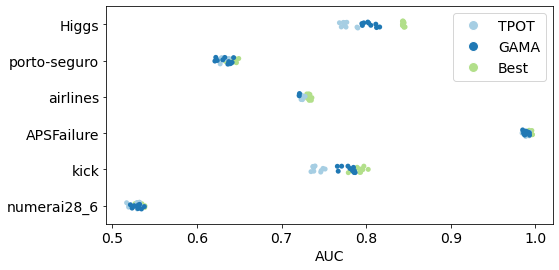

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
to_display = [("TPOT", "#a6cee3", 0), ("GAMA", "#1f78b4", 0), ("Best", "#b2df8a", -1)]
for framework, color, zorder in to_display:
    seaborn.stripplot(
        data=results[results.framework == framework].sort_values("task", key=lambda t: t.map(sort_dict)),
        color=color,
        zorder=zorder,
        x="result", y="task", ax=ax,
        label=framework
    )   
#seaborn.stripplot(data=results, x="result", y="task", hue="framework", palette=["#a6cee3", "#1f78b4", "#b2df8a"], ax=ax)
ax.set_xlabel("AUC", fontsize=14)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=f, markersize=10)
    for f, c, z in to_display
]
ax.legend(handles=legend_elements, fontsize=14)

In [15]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("tpot-gama.pdf") as f:
    f.savefig(fig, bbox_inches="tight")